In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
from cmocean import cm
from cartopy.crs import LambertAzimuthalEqualArea, PlateCarree
from cartopy.feature import LAND

%matplotlib inline

In [2]:
date0 = '19910915'
date1 = '19920101'
date2 = '19920915'


myi_file0 = f'../NERSC_arctic25km_sea_ice_age_v2p1/sic/1991/sic_{date0}_{date0}.npz'
sic_file1 = f'../NERSC_arctic25km_sea_ice_age_v2p1/sic/1992/sic_{date1}.npz'
myi_file2 = f'../NERSC_arctic25km_sea_ice_age_v2p1/sic/1992/sic_{date2}_{date2}.npz'

ca0_file1 = f'../NERSC_arctic25km_sea_ice_age_v2p1/sic/1991/sic_{date0}_{date1}.npz'
ca1_file2 = f'../NERSC_arctic25km_sea_ice_age_v2p1/sic/1991/sic_{date0}_{date2}.npz'

msh_file0 = f'../NERSC_arctic25km_sea_ice_age_v2p1/mesh/1991/mesh_{date0}.npz'
msh_file1 = f'../NERSC_arctic25km_sea_ice_age_v2p1/mesh/1992/mesh_{date1}.npz'
msh_file2 = f'../NERSC_arctic25km_sea_ice_age_v2p1/mesh/1992/mesh_{date2}.npz'

sic_files = [myi_file0, ca0_file1, sic_file1, ca1_file2, myi_file2]
msh_files = [msh_file0, msh_file1, msh_file1, msh_file2, msh_file2]
titles = ['$C_{MYI}$ 1991-09-15', '$C_{Ao}$ 1992-01-01', '$C_{TOT}$ 1992-01-01', '$C_{A1}$ 1992-09-15', '$C_{MYI}$ 1992-09-15']

srs_dst = LambertAzimuthalEqualArea(central_longitude=0, central_latitude=90)

In [3]:
def plot_sic(x, y, t, c, title, ofile, cmap=cm.ice):
    fig = plt.figure(figsize=(4, 5))
    ax = fig.add_subplot(1, 1, 1, projection=srs_dst)
    tcf = ax.tripcolor(x, y, t, c, cmap=cmap, zorder=0, clim=[0, 100])
    ax.add_feature(LAND, facecolor='lightgray', edgecolor='black', zorder=1)
    ax.set_extent([-1700000, 2000000, -2000000, 2200000], crs=srs_dst)
    plt.title(title, fontsize=26)
    plt.tight_layout()
    plt.savefig(ofile, dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.close()
    print(ofile)

for sic_file, msh_file, title in zip(sic_files, msh_files, titles):
    c = np.load(sic_file)['c']
    with np.load(msh_file) as ds:
        x = ds['x']*1000
        y = ds['y']*1000
        t = ds['t']
    ofile = os.path.basename(sic_file).replace('.npz', '.png')
    plot_sic(x, y, t, c, title, ofile)


sic_19910915_19910915.png
sic_19910915_19920101.png
sic_19920101.png
sic_19910915_19920915.png
sic_19920915_19920915.png


In [4]:
c_tot = np.load(sic_file1)['c']
c_ca0 = np.load(ca0_file1)['c']
c_1iy = c_tot - c_ca0
with np.load(msh_file1) as ds:
    x = ds['x']*1000
    y = ds['y']*1000
    t = ds['t']
plot_sic(x, y, t, c_1iy, '$C_{1Y}$ 1992-01-01', f'sic_1yi_{date1}.png', 'viridis')

sic_1yi_19920101.png


In [5]:
c_myi = np.load(myi_file2)['c']
c_ca1 = np.load(ca1_file2)['c']

c_2iy = c_myi - c_ca1
with np.load(msh_file2) as ds:
    x = ds['x']*1000
    y = ds['y']*1000
    t = ds['t']

plot_sic(x, y, t, c_2iy, '$C_{2Y}$ 1992-09-15', f'sic_2yi_{date2}.png', 'viridis')


sic_2yi_19920915.png


/var/folders/gs/j0b94wps7qb_qndm2zf0xdl40000gn/T/ipykernel_23804/3597879468.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmaps = [mcm.get_cmap(cm.ice), mcm.get_cmap('viridis')]


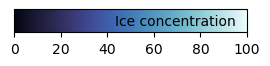

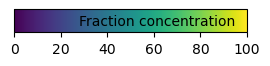

In [39]:
import matplotlib.pyplot as plt
import matplotlib.colorbar as mcolorbar
import matplotlib.colors as mcolors
import matplotlib.cm as mcm
from cmocean import cm

# 1. Define the colormap and normalization
#    Here, we use a 'viridis' colormap and a LinearNorm from 0 to 1.
cmaps = [mcm.get_cmap(cm.ice), mcm.get_cmap('viridis')]

titles = ['Ice concentration', 'Fraction concentration']
norm = mcolors.Normalize(vmin=0, vmax=100)

for cmap, title in zip(cmaps, titles):
    fig, ax = plt.subplots(figsize=(3, 0.3)) # Adjust figsize for desired colorbar dimensions
    cbar = mcolorbar.ColorbarBase(ax, cmap=cmap, norm=norm, orientation='horizontal')
    cbar.set_ticks([0, 20, 40, 60, 80, 100])
    ax.text(95, 0.3, title, zorder=10, horizontalalignment='right')
    plt.savefig(f'colorbar_{title.replace(" ", "_").lower()}.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

In [32]:
ax.text?

Signature: ax.text(x, y, s, fontdict=None, **kwargs)
Docstring:
Add text to the Axes.

Add the text *s* to the Axes at location *x*, *y* in data coordinates,
with a default ``horizontalalignment`` on the ``left`` and
``verticalalignment`` at the ``baseline``. See
:doc:`/gallery/text_labels_and_annotations/text_alignment`.

Parameters
----------
x, y : float
    The position to place the text. By default, this is in data
    coordinates. The coordinate system can be changed using the
    *transform* parameter.

s : str
    The text.

fontdict : dict, default: None

    .. admonition:: Discouraged

       The use of *fontdict* is discouraged. Parameters should be passed as
       individual keyword arguments or using dictionary-unpacking
       ``text(..., **fontdict)``.

    A dictionary to override the default text properties. If fontdict
    is None, the defaults are determined by `.rcParams`.

Returns
-------
`.Text`
    The created `.Text` instance.

Other Parameters
---------------